In [11]:
#import all of the libraries
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image

In [12]:
#Take all the photos, put them in a list, and edit them to a certain size
data_dir = r"C:\Users\411915\Downloads\Augmented\Augmented"
batch_size = 32
img_height = 180
img_width = 180

In [13]:
#put 80% into the training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 23600 files belonging to 20 classes.
Using 18880 files for training.


In [14]:

#put 20% into the valid dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 23600 files belonging to 20 classes.
Using 4720 files for validation.


In [15]:
#all the class names which they take straight from the folder name
class_names = train_ds.class_names

f = open("myfile.txt", "w")
for i in class_names:
    f.write(i + ' ')
    


In [16]:
#keeps the images in memory after they're loaded off disk during the first epoch 
#overlaps data preprocessing and model execution while training 

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [17]:
#standarize the RGB scale from 0 to 255 which is too big to a 0 1 scale
normalization_layer = layers.Rescaling(1./255)

In [18]:
#creates the Keras Model
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [19]:
#Compiles the Model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
#Epoch = one iteration over the dataset
#Getting information from the dataset
epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/15
590/590 [==============================] - 49s 82ms/step - loss: 0.2316 - accuracy: 0.9217 - val_loss: 0.3526 - val_accuracy: 0.8936
Epoch 2/15
590/590 [==============================] - 49s 83ms/step - loss: 0.1326 - accuracy: 0.9557 - val_loss: 0.3384 - val_accuracy: 0.9072
Epoch 3/15
590/590 [==============================] - 49s 83ms/step - loss: 0.0922 - accuracy: 0.9678 - val_loss: 0.7456 - val_accuracy: 0.8144
Epoch 4/15
590/590 [==============================] - 49s 83ms/step - loss: 0.0904 - accuracy: 0.9695 - val_loss: 0.3593 - val_accuracy: 0.9155
Epoch 5/15
590/590 [==============================] - 49s 83ms/step - loss: 0.0534 - accuracy: 0.9821 - val_loss: 0.5014 - val_accuracy: 0.8809
Epoch 6/15
590/590 [==============================] - 50s 84ms/step - loss: 0.0650 - accuracy: 0.9796 - val_loss: 0.3673 - val_accuracy: 0.9174
Epoch 7/15
590/590 [==============================] - 50s 86ms/step - loss: 0.0401 - accuracy: 0.9872 - val_loss: 0.4672 - val_accuracy:

In [22]:
#Save Model
model.save('my_model.keras')

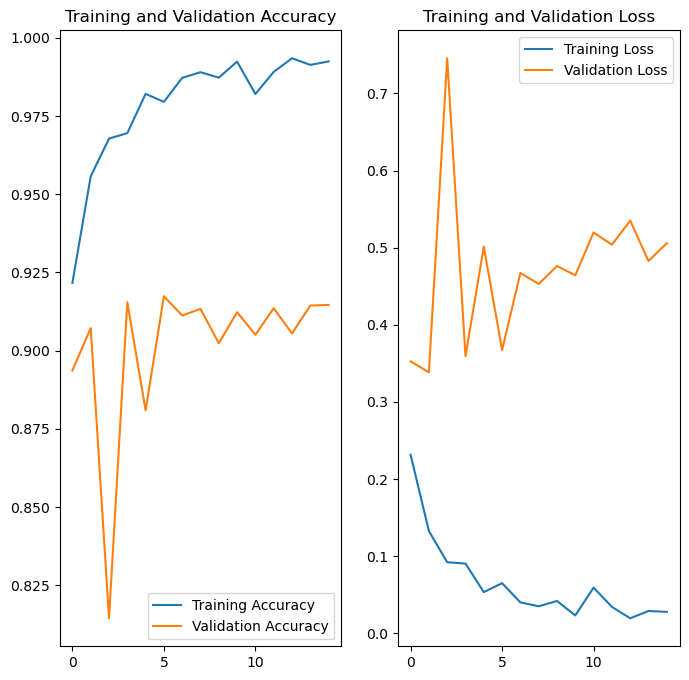

In [23]:
#Create plots of the loss and accuracy on the training and validation sets:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']

val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [25]:
#Generates additional data set for training model by augmenting them using random transformations that yield belieable images.
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)